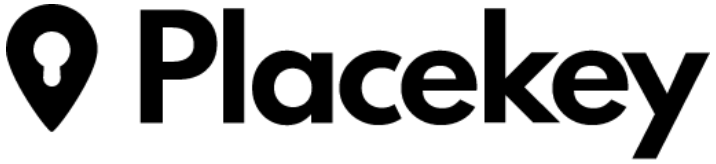

## Calling the Single API
Getting a Placekey for your data is super easy with the `plackey-py` library.


To Note: for any query, you can use any variation of the required fields minimum inputs here: [minimum required inputs](https://docs.placekey.io/documentation/placekey-api/input-parameters/minimum-inputs)


## Install the Package

In [2]:
!pip install placekey

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.9 MB/s eta 0:00:00
  Created wheel for ratelimit: filename=ratelimit-2.2.1-py3-none-any.whl size=5895 sha256=7c82feea5bcdef0807702b81bbf135bb6607b89bfa280c3962df7c8d56804ccc
  Stored in directory: /root/.cache/pip/wheels/27/5f/ba/e972a56dcbf5de9f2b7d2b2a710113970bd173c4dcd3d2c902
Successfully built ratelimit


## Initialize the Placekey API

In [3]:
from placekey.api import PlacekeyAPI
import pandas as pd
import json
pk_api = PlacekeyAPI(api_key="<your placekey api key>")

#### Getting a Placekey for a Query without Place Metadata

In [5]:
query = {
   "location_name": "Twin Peaks Petroleum",
  "street_address": "598 Portola Dr",
  "city": "San Francisco",
  "region": "CA",
  "postal_code": "94131",
  "iso_country_code": "US"
}
fields=["placekey", "building_placekey", "address_placekey"] # additionial fields you can request ["confidence_score", "geocode", "upi","geoid","parcel", "gers"]
pk_api.lookup_placekey(**query, fields=fields)

{'query_id': '0',
 'placekey': '227-223@5vg-82n-pgk',
 'address_placekey': '227@5vg-82n-pgk',
 'building_placekey': '227@5vg-82n-pgk'}

#### Getting a Placekey for a Query with Place Metadata
- The Placekey API allows you to pass contextual information that may be beneficial to matching with the option [`place_metadata`](https://docs.placekey.io/documentation/placekey-api/input-parameters/optional-parameters) field

In [7]:
query = {
    "street_address": "598 Portola Dr",
    "city": "San Francisco",
    "region": "CA",
    "postal_code": "94131",
    "iso_country_code": "US",
    "place_metadata": {"naics_code": "45115"}
}
fields=["placekey", "building_placekey", "address_placekey", "confidence_score", "geocode", "upi","geoid","parcel", "gers"]
pk_api.lookup_placekey(**query, fields=fields)

{'query_id': '0',
 'placekey': '227@5vg-82n-pgk',
 'address_placekey': '227@5vg-82n-pgk',
 'building_placekey': '227@5vg-82n-pgk',
 'confidence_score': 'HIGH',
 'gers': None,
 'upi': None,
 'parcel': None,
 'geoid': None,
 'geocode': {'location': {'lat': 37.74557, 'lng': -122.4517},
  'location_type': 'APPROXIMATE'}}